In [1]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [34]:
import math                      
import matplotlib.pyplot as plt  
import scipy                     
import cv2                       
import numpy as np               
import glob                      
import os                        
import pandas as pd              
import tensorflow as tf       
import itertools
import random
from random import shuffle       
from tqdm import tqdm            
from PIL import Image
from scipy import ndimage
from pathlib import Path
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
# loading train and test data
train = Path('./Question3/training/training/')
test = Path('./Question3/validation/validation/')
# Creating the labels for .txt file and printing it
col = ['Label', 'Latin Name', 'Common Name', 'Train Images', 'Validation Images']
label = pd.read_csv("./Question3/monkey_labels.txt", names=col, skiprows=1)
label

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [12]:
# Printing the label Common name data
label = label['Common Name']
label

0     mantled_howler                
1     patas_monkey                  
2     bald_uakari                   
3     japanese_macaque              
4     pygmy_marmoset                
5     white_headed_capuchin         
6     silvery_marmoset              
7     common_squirrel_monkey        
8     black_headed_night_monkey     
9     nilgiri_langur                
Name: Common Name, dtype: object

In [16]:
# defining method for image show
def image_show(num_image,label):
    for i in range(num_image):
        imgdir = Path('./Question3/training/training/' + label)
        imgfile = random.choice(os.listdir(imgdir))
        img = cv2.imread('./Question3/training/training/'+ label +'/'+ imgfile)
        plt.figure(i)
        plt.imshow(img)
        plt.title(imgfile)
    plt.show()

 white_headed_capuchin         


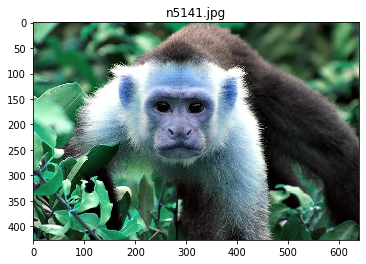

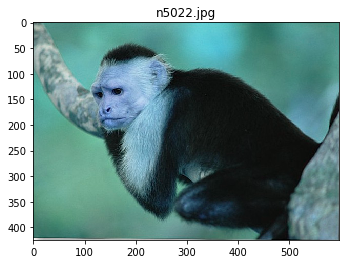

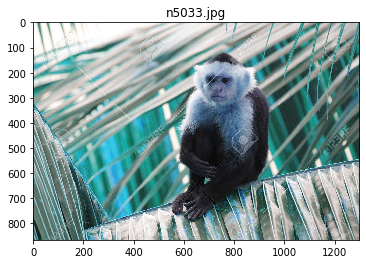

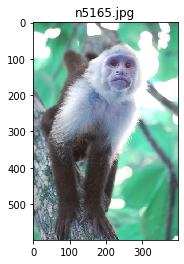

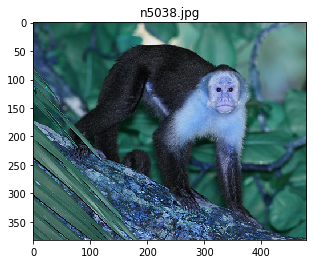

In [19]:
# printing 5 images of different labels
print(label[5])
image_show(5,'n5')

In [18]:
# Importing tqdm and appending folder names to read image data and store in array
from tqdm import tqdm
import skimage.transform
def get_data(folder):
    X = []
    y = []
    for folder in os.listdir(folder):
        if not folder.startswith('.'):
            if folder in ['n0']:
                label = 0
            elif folder in ['n1']:
                label = 1
            elif folder in ['n2']:
                label = 2
            elif folder in ['n3']:
                label = 3
            elif folder in ['n4']:
                label = 4
            elif folder in ['n5']:
                label = 5
            elif folder in ['n6']:
                label = 6
            elif folder in ['n7']:
                label = 7
            elif folder in ['n8']:
                label = 8
            elif folder in ['n9']:
                label = 9
            else:
                label = 10
            for image_file in tqdm(os.listdir(str(folder) + '/' + folder)):
                img_file = cv2.imread(str(folder) + '/' + folder + '/' + image_file)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (150, 150, 3))

                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y
X_train, y_train = get_data(train)
X_test, y_test= get_data(test)

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:18<00:00,  1.39it/s]


In [20]:
# apply encoding
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 10)
y_testHot = to_categorical(y_test, num_classes = 10)

In [21]:
# creating sequential model
num_classes = 10
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [22]:
# Complie the model and display the summary
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 36, 36, 64)       

In [23]:
# creating history object by model fitting
history = model.fit(X_train,y_trainHot, epochs=5, validation_data=(X_test,y_testHot), verbose=1,batch_size = 1)


Instructions for updating:
Use tf.cast instead.
Train on 1098 samples, validate on 272 samples
Epoch 1/5
1098/1098 [==============================] - 158s 144ms/step - loss: 2.3084 - acc: 0.0947 - val_loss: 2.3020 - val_acc: 0.1103
Epoch 2/5
1098/1098 [==============================] - 158s 143ms/step - loss: 2.3053 - acc: 0.1020 - val_loss: 2.3018 - val_acc: 0.1103
Epoch 3/5
1098/1098 [==============================] - 155s 141ms/step - loss: 2.3035 - acc: 0.1056 - val_loss: 2.3017 - val_acc: 0.1103
Epoch 4/5
1098/1098 [==============================] - 158s 144ms/step - loss: 2.3036 - acc: 0.1102 - val_loss: 2.3017 - val_acc: 0.1103
Epoch 5/5
1098/1098 [==============================] - 155s 141ms/step - loss: 2.3033 - acc: 0.1056 - val_loss: 2.3017 - val_acc: 0.1103


In [24]:
# Evaluating the model and finding the accuracy before scaling
score = model.evaluate(X_test,y_testHot, verbose=0)
print('accuracy:', score[1], '\n')

accuracy: 0.11029411852359772 



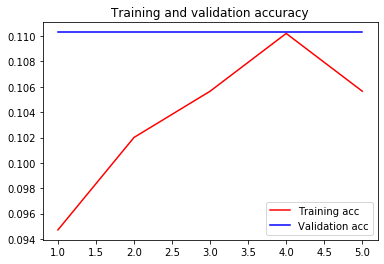

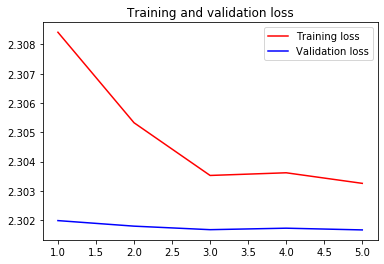

In [25]:
# Plotting the graphs for loss and accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [26]:
# Applying scaling using Standar Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fitting and Transforming the data
scaler.fit(y_trainHot)
y_trainHot1 = scaler.transform(y_trainHot)
y_testHot1 = scaler.transform(y_testHot)

In [27]:
# Creating Srquential model
num_classes = 10
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes))
model1.add(Activation('softmax'))

In [28]:
# model compiling and displaying the summary
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_7 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 36, 36, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)       

In [29]:
# creating the history object by model fit
history1 = model1.fit(X_train,y_trainHot1, epochs=5, validation_data=(X_test,y_testHot1), verbose=1)

Train on 1098 samples, validate on 272 samples
Epoch 1/5
1098/1098 [==============================] - 40s 37ms/step - loss: 0.0723 - acc: 0.1047 - val_loss: 0.0522 - val_acc: 0.0993
Epoch 2/5
1098/1098 [==============================] - 34s 31ms/step - loss: -4.4574e-06 - acc: 0.1002 - val_loss: 0.0522 - val_acc: 0.0993
Epoch 3/5
1098/1098 [==============================] - 39s 36ms/step - loss: -4.4279e-06 - acc: 0.1002 - val_loss: 0.0522 - val_acc: 0.0993
Epoch 4/5
1098/1098 [==============================] - 38s 35ms/step - loss: -4.4097e-06 - acc: 0.1002 - val_loss: 0.0522 - val_acc: 0.0993
Epoch 5/5
1098/1098 [==============================] - 38s 34ms/step - loss: -4.3793e-06 - acc: 0.1002 - val_loss: 0.0522 - val_acc: 0.0993


In [37]:
# Evaluating the model and finding accuracy after scaling
score = model1.evaluate(X_test,y_testHot, verbose=0)
print('accuracy:', score[1], '\n')

accuracy: 0.0992647036910057 



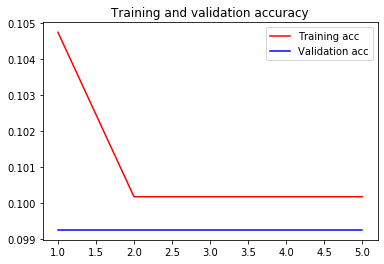

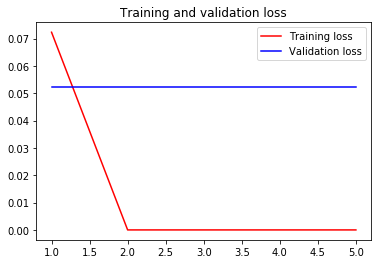

In [30]:
# Plotting for accuracy and loss
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [31]:
# Saving the model
model.save('cifar101.h5')

In [36]:
# Applying prediction and checking it
for i in range(0,4):
    predicted_value = model.predict(X_test[[i],:])
    predict_classes = model.predict_classes(X_test[[i],:])
    actual_value = y_testHot[[i],:]
    print("Actual Value for :" + str(i+1) + ' Image ' + str(np.argmax(actual_value)))
    print("Predicted Value for " + str(i+1) + ' Image ' + str(predict_classes[0])+'\n')

Actual Value for :1 Image 0
Predicted Value for 1 Image 3

Actual Value for :2 Image 0
Predicted Value for 2 Image 3

Actual Value for :3 Image 0
Predicted Value for 3 Image 3

Actual Value for :4 Image 0
Predicted Value for 4 Image 3

